단순선형회귀 형태를 사용해 데이터 해석

In [1]:
from pandas import read_excel
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
from helper import pearson_r

# 연습문제 1

In [2]:
df=read_excel("https://data.hossam.kr/E04/beans.xlsx")
df

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


## #01. 탐색적 데이터 분석

### 산점도 그래프

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

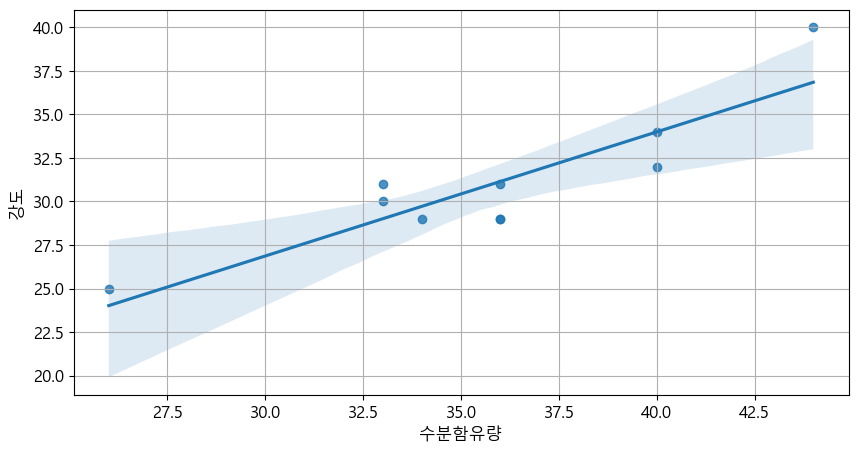

In [5]:
plt.rcParams['figure.figsize'] = (10, 5)
sb.regplot(data=df, x='수분함유량', y='강도')
plt.grid()
plt.show()
plt.close()

## #02. 추론통계

### 1) 상관분석

In [6]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
수분함유량 vs 강도,0.888052,0.000599,True
강도 vs 수분함유량,0.888052,0.000599,True


> 상관분석 결과 p-value가 0.05보다 작으므로 수분함유량과 강도는 양의 상관관계가 통계적으로 유의함을 판단 할 수 있다.

### 2) 회귀분석

$y = ax + b$ 에 따라 `종속(강도) ~ 독립(수분함유량)` 형태로 표현식을 구성한다.

In [7]:
model = ols("강도 ~ 수분함유량", data=df)
model

#### 분석을 위한 학습모델 구성

In [9]:
model = ols("강도 ~ 수분함유량", data=df)
model

#### 분석 수행

In [10]:
fit = model.fit()
fit

#### 분석결과 확인

In [11]:
fit.summary()

c:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000599
Time:                        16:24:22   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.276      -5.355      16.353
수분함유량          0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `모형적합도` 해석

모형이 데이터에 잘 맞는 정도. 즉, 결론의 신빙성 정도

```plain
수분함유량과 강도
R-squared:          0.789
Adj. R-squared:     0.762
F-statistic:        29.85
Prob(F-statistic):  0.000599
Log-Likelihood:     -19.614
AIC:                43.23
BIC:                43.83
```

#### R-squared (R제곱, 결정계수)

모형의 설명력을 의미

> 강도를 수분함유량이 약 79% 설명한다. (각 사례마다 수분함유량에 차이가 있다.)

#### Adj. R-squared

독립변수가 여러 개인 다중회귀분석에서 사용

독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정

서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다

#### F-statistic: 29.85, Prob(F-statistic): 0.000599

회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)

즉, 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음

#### AIC, BIC

로그 우도: 종속변수가 정규분포라고 가정했을 때의 우도 

로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)

### `회귀계수(coef)` 해석

| | coef | (...생략...) | P>t |
| -- | -- | -- | -- |
| Intercept | 5.4991 | (...생략...) | 0.276 |
| 수분함유량 | 0.7123 | (...생략...) | 0.001 |

```plain
            coef    (...생략...)    P>|t|
-------------------------------------------
Intercept   5.4991  (...생략...)    0.276
수분함유량   0.7123  (...생략...)    0.001
```

데이터로부터 얻은 계수의 추정치

절편(Intercept)의 추정치는 5.4991로, 수분함유량이 0일 때 강도의 값

강도의 계수 추정치는 0.7123로 수분함유량이 1 증가할 때마다 강도가 0.7123 증가한다는 것을 의미

#### 수식으로 정리

$dist = 5.4991 + 0.7123 \times 수분함유량$

#### p값

모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률

이 확률이 매우 작다는 것은, 모집단에서 수분함유량의 계수가 정확히 0.7123는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미

보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 정리

> 수분함유량이 증가할 때 기대되는 강도의 변화는 유의수준 5%에서 통계적으로 유의하다.

### `결과 보고`

#### 모형적합도 보고

F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

```
dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,48) = 89.57, p < 0.05)
```

#### 독립변수에 대해 보고

```
수분함유량의 회귀계수는 3.9324로, 강도에 대하여 유의미한 예측변인인 것으로 나타났다.(t(48) = 9.464, p < 0.05)
```

### `결과 보고`

#### 모형적합도 보고

F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

```
dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,8) = 29.85, p < 0.05) Prob (F-statistic):	0.000599
```

#### 독립변수에 대해 보고

```
수분함유량의 회귀계수는 5.4991로, 강도에 대하여 유의미한 예측변인인 것으로 나타났다.(t(8) = 5.463, p < 0.05) 	P>|t| : 0.001
```

# 연습문제2

아래의 데이터는 10년간 에어컨의 예약대수에 따른 실 판매대수를 조사한 가상의 데이터이다.

```
요구사항
위 데이터를 분석하고 결과를 보고하시오.
기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.
```

In [12]:
df = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
df

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50
5,38,69
6,39,70
7,46,64
8,49,89
9,58,98


# 문제3
아래의 데이터는 부모의 키에 따른 자식의 키를 조사한 데이터이다.

```
요구사항
위 데이터를 분석하고 결과를 보고하시오.
당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.
```

In [13]:
df = read_excel("https://data.hossam.kr/E04/galton.xlsx")
df

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5
